# **Assignment 6 - Convolutional Neural Network (CNN)**

By:

Fernando Patricio Gutiérrez González 2010356

Axel Muñoz Baca 2132103

Ulises Castillo Díaz 2050354

Pablo Daniel Contreras Obregón 2055281

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Reshape data to (samples, height, width, channels)
train_data = train_data.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_data  = test_data.reshape((10000, 28, 28, 1)).astype("float32") / 255

# One-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat  = to_categorical(test_labels)


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')   # Output layer
])

model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    train_labels_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.9067 - loss: 0.3062 - val_accuracy: 0.9865 - val_loss: 0.0439
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9860 - loss: 0.0457 - val_accuracy: 0.9898 - val_loss: 0.0343
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9903 - loss: 0.0296 - val_accuracy: 0.9877 - val_loss: 0.0423
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9934 - loss: 0.0216 - val_accuracy: 0.9880 - val_loss: 0.0488
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9947 - loss: 0.0147 - val_accuracy: 0.9915 - val_loss: 0.0365
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.9960 - loss: 0.0120 - val_accuracy: 0.9917 - val_loss: 0.0362
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.9903 - val_loss: 0.0473
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9975 -

In [6]:
test_loss, test_acc = model.evaluate(test_data, test_labels_cat)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9821 - loss: 0.0845
Test accuracy: 0.9868


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Prediction: 6 | Actual value: 6


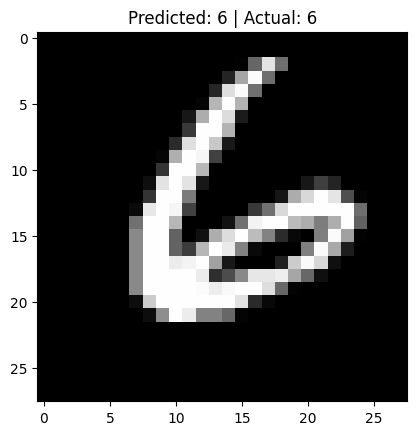

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: 6 | Actual value: 6


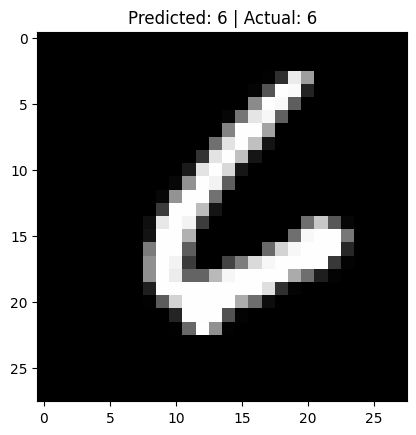

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction: 5 | Actual value: 5


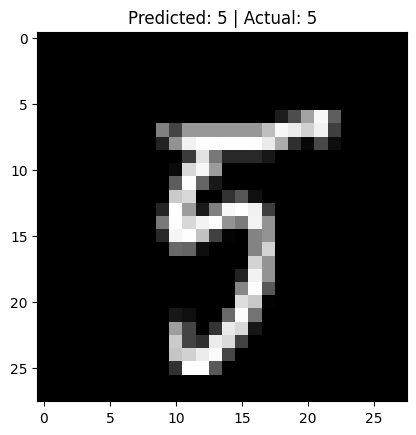

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: 1 | Actual value: 1


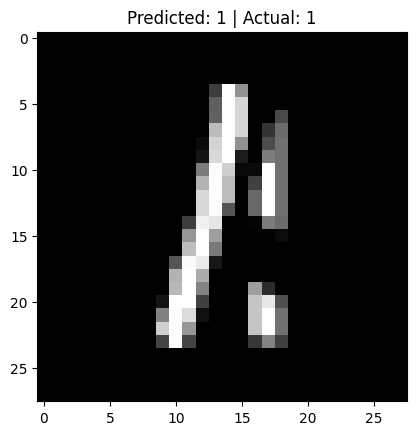

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: 8 | Actual value: 8


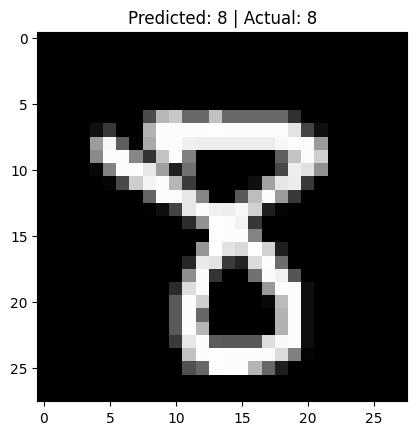

In [7]:
for i in range(5):
    index = np.random.randint(0, len(test_data))
    image = test_data[index]
    prediction = model.predict(image.reshape(1,28,28,1))
    pred_label = np.argmax(prediction)

    print(f"Prediction: {pred_label} | Actual value: {test_labels[index]}")

    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {pred_label} | Actual: {test_labels[index]}")
    plt.show()
